# Creating the Segmentation Models

## The following code was used in testing different Segmentation Variables and different Clustering and Mixture Models 

### The Process
- Six different variations of Segment Variables were used assessed
- Three different clustering/mixture models were assessed
    - KMeans
    - Agglomerative (Hierarchical) Clustering
        - Adjusting for Affinity and Linkage parameters
    - Gaussian Mixture Model
        - Adjusting for Covariance Type parameter
- Multiple scoring metrics were used to assess 'best' models including:
    - Within-cluster sum of squares
    - Silhouette Score
    - AIC Score
    - BIC Score
- Assessed across multiple k-values
    - 3 - 10


### The Results
- The Best Silhoutte Scores for each model type, and parameters are as follows and are analyzed in 'SelectingBestClusterModel.ipynb'
    - KMeans: 
        - Silhouette Score = .451
        - Segment Vars 6
        - k = 3
    - Hierarchical Clustering:
        - Silhouette Score = .4657
        - Segment Vars 6
        - k = 3
        - Linkage = Average
        - Affinity = Cosine
    - Gaussian Mixture Model
        - Silhouette = .451
        - Segment Vars 6
        - k = 3
        - Covariance Type = Spherical
        
## Work Shown Below

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from pipeline import *
%autoreload

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [13]:
path = '../data/2017 Pew Research Center Science and News Survey/Segmentation_data.csv'

### Variables considered during segmentation process
##### Scales are Standardized in pipeline.py get_cluster_data

| V-Name | Description | NumScale | Scale|
|----|
|TOPICINT_a|Interest in Government News|1-4| Very Interested - Not at all Interested|
|TOPICINT_b|Interest in Local Comm. News|1-4| Very Interested - Not at all Interested|
|TOPICINT_c|Interest in Sports News|1-4| Very Interested - Not at all Interested|
|TOPICINT_d|Interest in Business/Finance News|1-4| Very Interested - Not at all Interested|
|TOPICINT_e|Interest in Science News|1-4| Very Interested - Not at all Interested|
|TOPICINT_f|Interest in Entertainment News|1-4| Very Interested - Not at all Interested|
|SCIOFTEN|Frequency follow science news|1-4| Nearly Everyday - Less often|
|TOPICS1|How get science news |1-2| 1:Couple topics 2: A lot of topics|
|SOURCE1|How get science news |1-2| 1:Couple sources 2: A lot of sources|
|SOURCE2|How get science news |1-2| 1:Sources that specialize 2: Sources cover general news|
|SEEK|How get science news |1-2| 1:Look for it 2: Happen accross it|
|SCIWHY_a|Reasons follow news: Enjoy talking about|1-3| Major Reason - Not a Reason|
|SCIWHY_b|Reasons follow news: Related to job|1-3| Major Reason - Not a Reason|
|SCIWHY_c|Reasons follow news: Helps make life descions|1-3| Major Reason - Not a Reason|
|SCIWHY_d|Reasons follow news: Social/civil obligation|1-3| Major Reason - Not a Reason|
|SCIWHY_e|Reasons follow news: Curious about|1-3| Major Reason - Not a Reason|
|SCIWHY_g|Reasons follow news: Related to personal hobbies|1-3| Major Reason - Not a Reason|
|WHYNOT_a|Reasons not follow news: Boring|1-3| Major Reason - Not a Reason|
|WHYNOT_b|Reasons not follow news: Hard to understand|1-3| Major Reason - Not a Reason|
|WHYNOT_c|Reasons not follow news: Disagree with it|1-3| Major Reason - Not a Reason|
|WHYNOT_d|Reasons not follow news: Not important|1-3| Major Reason - Not a Reason|
|WHYNOT_e|Reasons not follow news: Too busy|1-3| Major Reason - Not a Reason|
|WHYNOT_f|Reasons not follow news: Already get enough|1-3| Major Reason - Not a Reason|
|WHYNOT_g|Reasons not follow news: Sources regularly get dont cover|1-3| Major Reason - Not a Reason|
|WHYNOT_h|Reasons not follow news: Don't cover topics of interest|1-3| Major Reason - Not a Reason|
|ENJOY|How much enjoy following science news|1-4| A lot more than other news - A lot less|
|KNOWLEDGE|How much know about science news|1-4| A lot - Nothing at all|

In [14]:
segment_vars1 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'SOURCE1', 'SOURCE2', 'SEEK',
                'SCIWHY_a', 'SCIWHY_b', 'SCIWHY_c', 'SCIWHY_d', 'SCIWHY_e',
                'SCIWHY_g', 'WHYNOT_a', 'WHYNOT_b', 'WHYNOT_c', 'WHYNOT_d',
                 'WHYNOT_e', 'WHYNOT_f', 'WHYNOT_g', 'WHYNOT_h']

segment_vars2 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'ENJOY', 'KNOWLEDGE',
                'SCIWHY_a', 'SCIWHY_b', 'SCIWHY_c', 'SCIWHY_d', 'SCIWHY_e',
                'SCIWHY_g', 'WHYNOT_a', 'WHYNOT_b', 'WHYNOT_c', 'WHYNOT_d',
                 'WHYNOT_e', 'WHYNOT_f', 'WHYNOT_g', 'WHYNOT_h']

segment_vars3 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'ENJOY', 'KNOWLEDGE']

segment_vars4 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
               'TOPICINT_e', 'TOPICINT_f', 'ENJOY', 'KNOWLEDGE', 'SCIOFTEN']

segment_vars5 = ['TOPICINT_c', 'TOPICINT_e', 'TOPICINT_f', 'SCIOFTEN', 'TOPICS1']

segment_vars6 = ['ENJOY', 'KNOWLEDGE', 'SCIOFTEN', 'TOPICS1']

In [ ]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
data1, segment_data1 = get_cluster_data(path, segment_vars1)
data2, segment_data2 = get_cluster_data(path, segment_vars2)
data3, segment_data3 = get_cluster_data(path, segment_vars3)
data4, segment_data4 = get_cluster_data(path, segment_vars4)
data5, segment_data5 = get_cluster_data(path, segment_vars5)
data6, segment_data6 = get_cluster_data(path, segment_vars6)

# KMeans

In [18]:
def euclidean_distance(x, y):
    euc = x-y
    dist = (np.sqrt(sum(euc**2)))
    return dist

In [19]:
def wcss_score(X, labels, centers):
    wcss = 0
    X_data = X.copy()
    X_data['labels'] = labels
    X_data = np.asarray(X_data)
    for label in set(X_data[:, -1]):
        #sum of distance squared between all points and centroid in cluster
        for x_i in (X_data[X_data[:, -1] == label]):
            dist = euclidean_distance(x_i[:-1], centers[int(label)])
            wcss += dist**2

    return wcss

In [35]:
def plot_scores_kmeans(X, k_vals):
    wcss_scores = []
    sil_scores = []
    for k in k_vals:
        model = KMeans(n_clusters = k)
        fit_model = model.fit(X)
        labels = fit_model.labels_
        centers = fit_model.cluster_centers_
        wcss = wcss_score(X, labels, centers)
        wcss_scores.append(wcss)
        sil = silhouette_score(X, labels)
        sil_scores.append(sil)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, wcss_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("within-cluster sum of squares")
    ax.set_title('KMeans')
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    print(sil_scores)

    plt.show()

### Assessing best K and best segment variables to use

#### Segment Vars1

[0.09979548252565205, 0.09786945045857022, 0.09124953364116851, 0.08901115631406666, 0.0849530004367796, 0.07814736880368443, 0.08261090730640407, 0.0805027729772409]


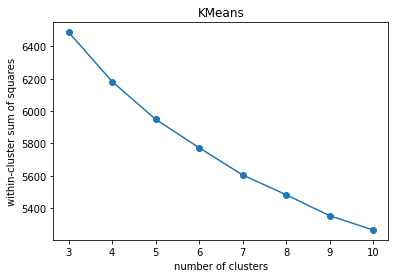

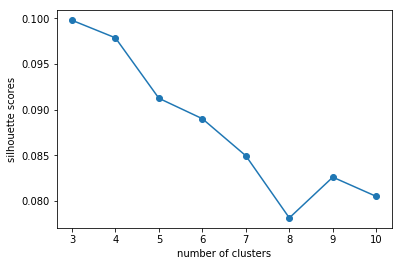

In [36]:
plot_scores_kmeans(segment_data1, k_vals)

#### Segment Vars2

[0.14399979575333444, 0.09968549623119016, 0.09536900141669662, 0.09179850196671807, 0.07826815906422513, 0.07275715373113333, 0.06588082514252744, 0.06849923676724058]


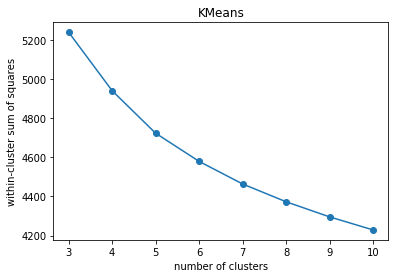

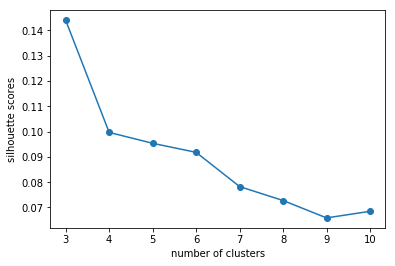

In [37]:
plot_scores_kmeans(segment_data2, k_vals)

#### Segment Vars3

[0.23922163636846439, 0.17053595152514142, 0.15456229234372976, 0.15164467080969576, 0.14607573552478528, 0.13326144532594641, 0.131007547119692, 0.13296234733737888]


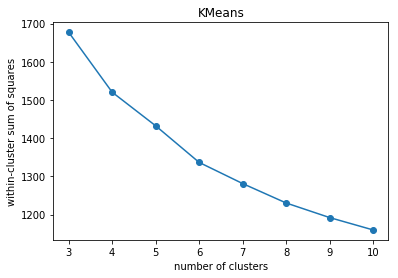

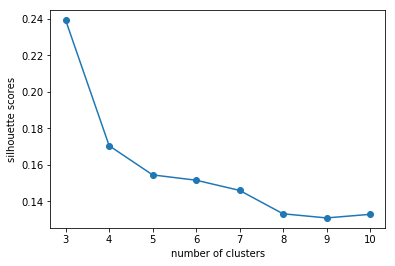

In [38]:
plot_scores_kmeans(segment_data3, k_vals)

#### Segment Vars4

[0.16084020016304257, 0.14457968139311198, 0.13504078271973757, 0.132868471377549, 0.1305841381494258, 0.12775530022846648, 0.12424639435176697, 0.12279184335249477]


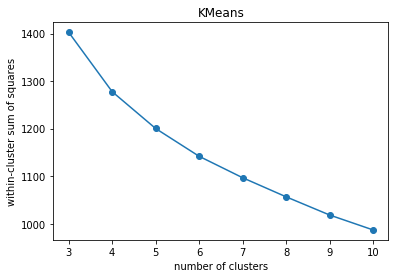

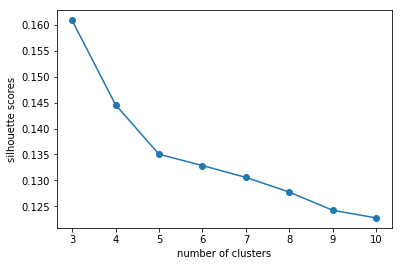

In [39]:
plot_scores_kmeans(segment_data4, k_vals)

#### Segment Vars 5

[0.3161766159307462, 0.2739163884472821, 0.2673426296608571, 0.24676821972080037, 0.25678072532501467, 0.24359219971061805, 0.248535933403128, 0.25406043131954015]


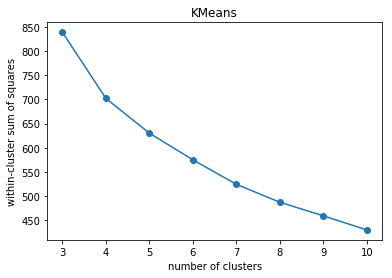

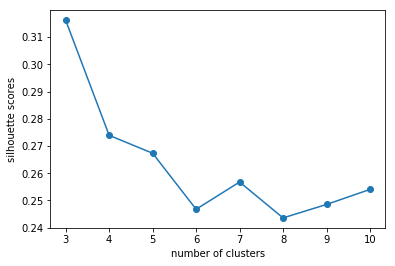

In [40]:
plot_scores_kmeans(segment_data5, k_vals)

#### Segment Vars 6

[0.45112717371537525, 0.3970577263029513, 0.39477303117161644, 0.3739132323514095, 0.397204245141055, 0.3912325946984378, 0.40932901740226296, 0.4291053623369319]


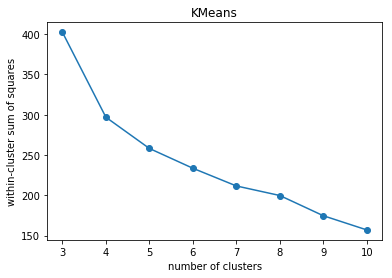

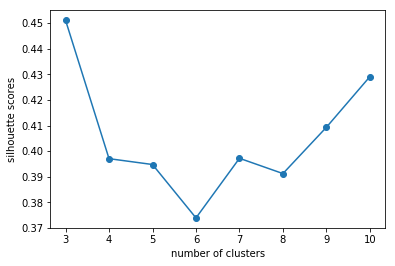

In [41]:
plot_scores_kmeans(segment_data6, k_vals)

#### Best KMeans Score: .451
- Segment Vars 6
- K = 3

# Hierarchical Clustering

**Parameters to Try**
- Linkages:
    - Ward
    - Complete
    - Average
    - Single
- Affinity:
    - Euclidean
    - Manhattan
    - l1
    - l2
    - cosine

In [42]:
def plot_sil_scores_hclust(X, k_vals, affinity, linkage):
    sil_scores = []
    for k in k_vals:
        model = AgglomerativeClustering(n_clusters = k, affinity =affinity, linkage = linkage)
        fit_model = model.fit(X)
        labels = fit_model.labels_
        sil = silhouette_score(X, labels)
        sil_scores.append(sil)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    ax.set_title('Hierarchical, {}, {}'.format(affinity, linkage))
    print(sil_scores)

    plt.show()

### Assessing best K and best segment variables to use

#### Segment Vars1

[0.08122552177540002, 0.08448713157491625, 0.07461704830517119, 0.0800622761842239, 0.0731064882154632, 0.06452727799258312, 0.06673375761161822, 0.06730409732411265]


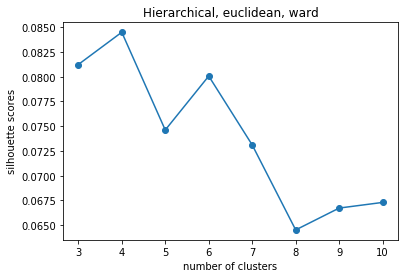

In [43]:
## Can only use Euclidean with Ward
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'ward')

[0.09986827343244013, 0.08087796049911614, 0.0761741277474333, 0.05642660071511373, 0.04587166752231659, 0.02992579332138686, 0.023152672540076618, 0.025856975857792053]


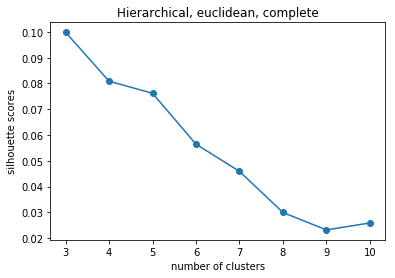

[0.1064874175892791, 0.06328868514485053, 0.05473521095528515, 0.037460443140875536, 0.029431611408951404, 0.025732849469463526, 0.027731215129590675, 0.02834014944209926]


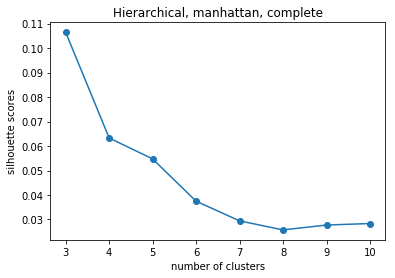

[0.1064874175892791, 0.06328868514485053, 0.05473521095528515, 0.037460443140875536, 0.029431611408951404, 0.025732849469463526, 0.027731215129590675, 0.02834014944209926]


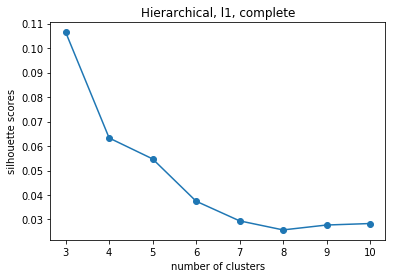

[0.09986827343244013, 0.08087796049911614, 0.0761741277474333, 0.05642660071511373, 0.04587166752231659, 0.02992579332138686, 0.023152672540076618, 0.025856975857792053]


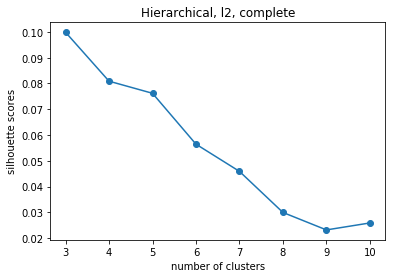

[0.06121648199972212, 0.04358281564832641, 0.05069225508400638, 0.050276433758206604, 0.04239910377992104, 0.04320738996674154, 0.03254192333317789, 0.030253184109011]


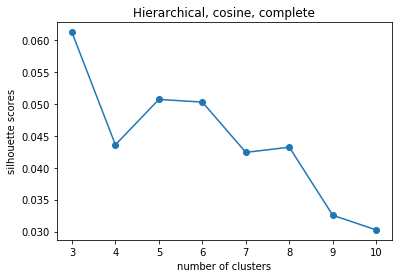

In [44]:
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'cosine', 'complete')

[0.1650110881694442, 0.13046894069338227, 0.08464584408446477, 0.06558436722880738, 0.06227705959740676, 0.05580903462356771, 0.05506761895209701, 0.032402521786582934]


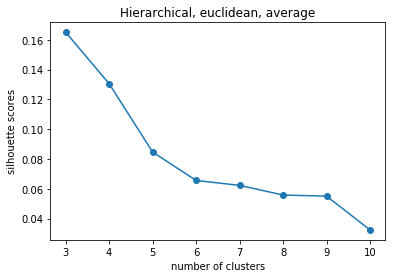

[0.1263343465930235, 0.10459563838417764, 0.08475890872591284, 0.06444610313347907, 0.04875775833445502, 0.042707847423336054, 0.037022302036488285, 0.03659517506033586]


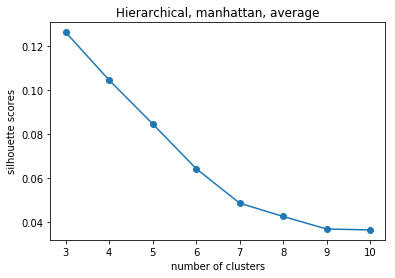

[0.1263343465930235, 0.10459563838417764, 0.08475890872591284, 0.06444610313347907, 0.04875775833445502, 0.042707847423336054, 0.037022302036488285, 0.03659517506033586]


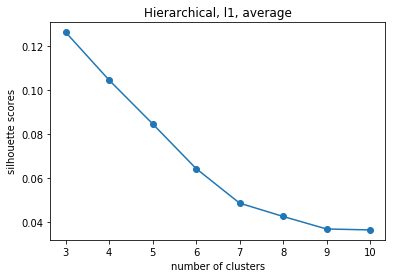

[0.1650110881694442, 0.13046894069338227, 0.08464584408446477, 0.06558436722880738, 0.06227705959740676, 0.05580903462356771, 0.05506761895209701, 0.032402521786582934]


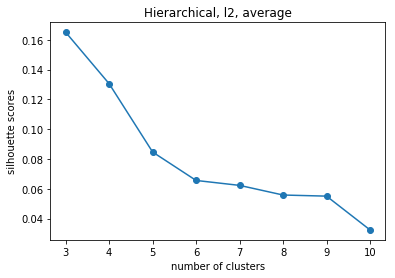

[0.2001006562798294, 0.18264680861472657, 0.16457930842046878, 0.15710583690109767, 0.144243327255965, 0.10186543996309533, 0.09233701288034066, 0.09162443716024742]


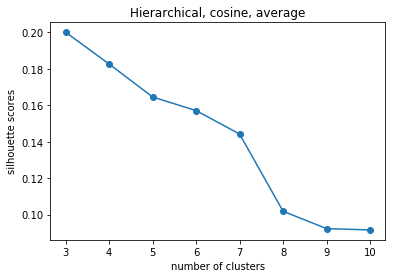

In [45]:
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'cosine', 'average')

#### Segment Vars 2 

[0.1369211754176025, 0.07974445245517656, 0.06980800993038459, 0.06664783966334564, 0.05153893947067365, 0.05371113974569806, 0.05033468890215822, 0.0462922291847561]


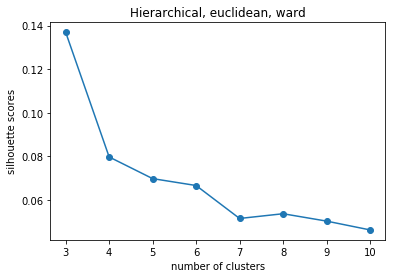

In [46]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'ward')

[0.09589736390236762, 0.07372377046164323, 0.03360170838365856, 0.03051784323187101, 0.026445446513444163, 0.02538069454577941, 0.02175300766608627, 0.018123971260094726]


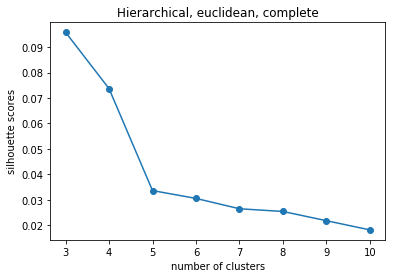

[0.0999142790529866, 0.0614680742861896, 0.05627647271389994, 0.05390395950399599, 0.04819612959377958, 0.03488489755321279, 0.02995498273604876, 0.028826075870244345]


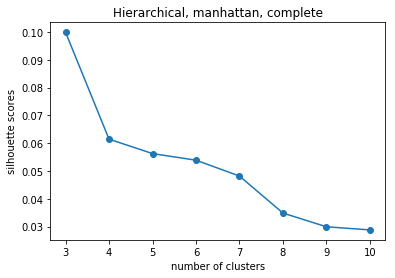

[0.0999142790529866, 0.0614680742861896, 0.05627647271389994, 0.05390395950399599, 0.04819612959377958, 0.03488489755321279, 0.02995498273604876, 0.028826075870244345]


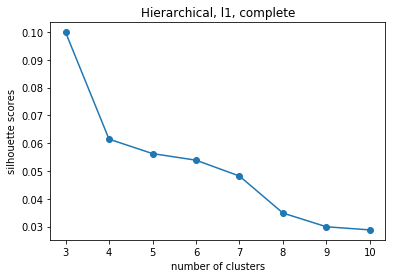

[0.09589736390236762, 0.07372377046164323, 0.03360170838365856, 0.03051784323187101, 0.026445446513444163, 0.02538069454577941, 0.02175300766608627, 0.018123971260094726]


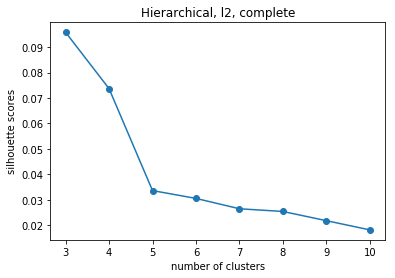

[0.10891020982615432, 0.10993068459206837, 0.11002435939413506, 0.0986690736787256, 0.04593199211733638, 0.04435186543727737, 0.02795828751158296, 0.027755948821111737]


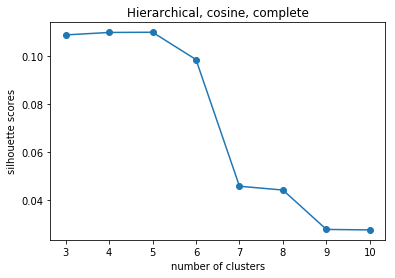

In [47]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'cosine', 'complete')

[0.2201633363872736, 0.20413682181484083, 0.17074997278028542, 0.1574515110650158, 0.12736835706129523, 0.10059700229035592, 0.09232868429565966, 0.0827674942937399]


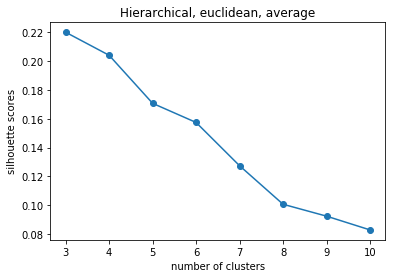

[0.22055755811708064, 0.18725719220514622, 0.14827472203034758, 0.11910346152267545, 0.1006211192012316, 0.08381145944068105, 0.06983614489011972, 0.0629766669226845]


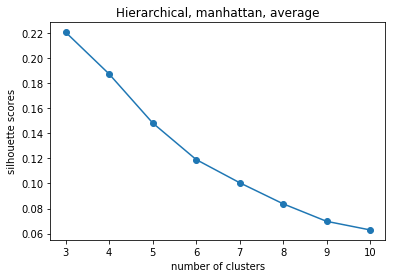

[0.22055755811708064, 0.18725719220514622, 0.14827472203034758, 0.11910346152267545, 0.1006211192012316, 0.08381145944068105, 0.06983614489011972, 0.0629766669226845]


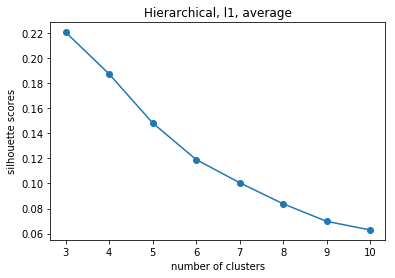

[0.2201633363872736, 0.20413682181484083, 0.17074997278028542, 0.1574515110650158, 0.12736835706129523, 0.10059700229035592, 0.09232868429565966, 0.0827674942937399]


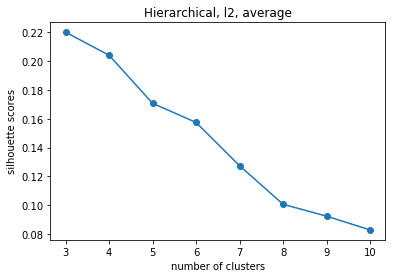

[0.2091578074260465, 0.19151069899383608, 0.1629713062401182, 0.14181705933868177, 0.14395817777949035, 0.1270075128273336, 0.11259551744546577, 0.10020974630149909]


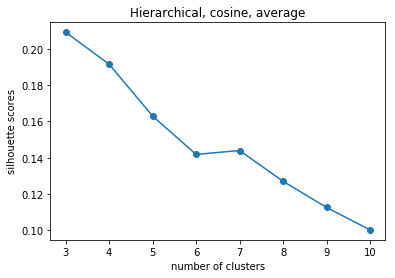

In [48]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'cosine', 'average')

#### Segment Vars3

[0.22260063318165613, 0.14396949934669392, 0.13849847876474589, 0.12076608996124165, 0.09945339886313892, 0.09079288631898721, 0.08991427048698897, 0.08858350444053978]


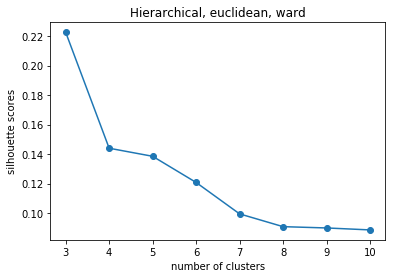

In [49]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'ward')

[0.031738446134602985, 0.08261782596186566, 0.04906426560138374, 0.03881139409091515, 0.06250870281780162, 0.073713148437936, 0.0676072947433288, 0.07034040222926638]


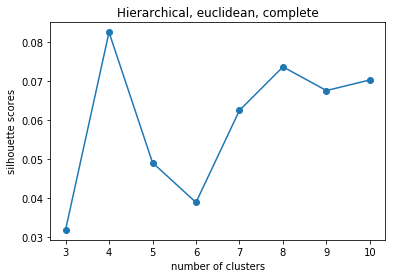

[0.23241810993844078, 0.2120131362830171, 0.07536413981308268, 0.04531661972536095, 0.05088661799795754, 0.060106750389612926, 0.05295587284840506, 0.04283733264010138]


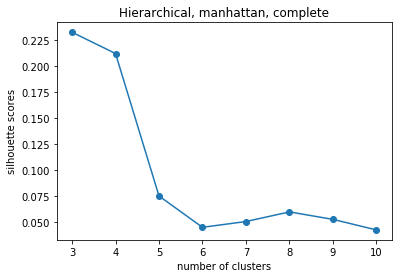

[0.23241810993844078, 0.2120131362830171, 0.07536413981308268, 0.04531661972536095, 0.05088661799795754, 0.060106750389612926, 0.05295587284840506, 0.04283733264010138]


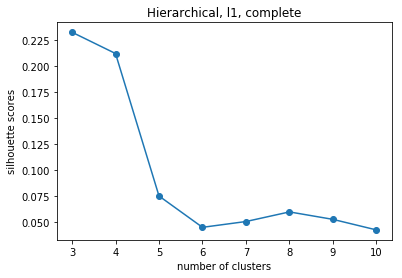

[0.031738446134602985, 0.08261782596186566, 0.04906426560138374, 0.03881139409091515, 0.06250870281780162, 0.073713148437936, 0.0676072947433288, 0.07034040222926638]


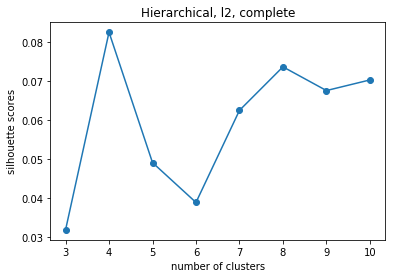

[0.18995791138536866, 0.03713479516151432, 0.03519574456859429, 0.05138034666170892, 0.04097144121681551, 0.03351626360737194, 0.027639741263306015, 0.027184301570443128]


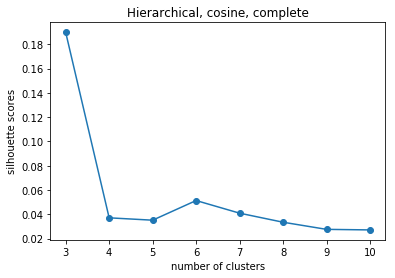

In [50]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'cosine', 'complete')

[0.18461996435828212, 0.15858677788702538, 0.25441923582383774, 0.23184116632910437, 0.22733557211688504, 0.21588516012095949, 0.17463775435374754, 0.14273125969714617]


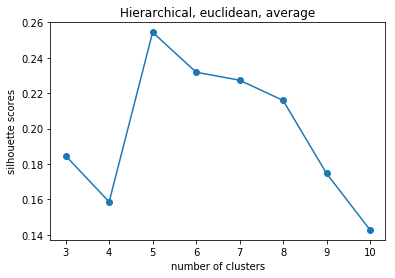

[0.281400314258791, 0.24351152313079763, 0.22803850785248464, 0.2158267151157249, 0.20515924635814758, 0.1869827634093446, 0.17593065627119042, 0.16457067355623836]


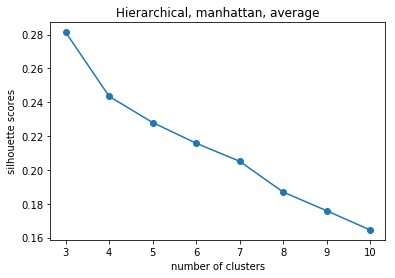

[0.281400314258791, 0.24351152313079763, 0.22803850785248464, 0.2158267151157249, 0.20515924635814758, 0.1869827634093446, 0.17593065627119042, 0.16457067355623836]


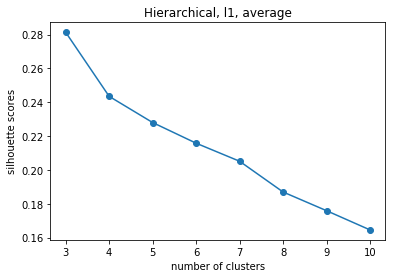

[0.18461996435828212, 0.15858677788702538, 0.25441923582383774, 0.23184116632910437, 0.22733557211688504, 0.21588516012095949, 0.17463775435374754, 0.14273125969714617]


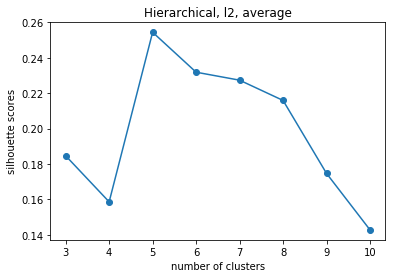

[0.28125283699383263, 0.22481604680478548, 0.16942908687015998, 0.15527836288008542, 0.15229687920578397, 0.13202651571207522, 0.12465375955136684, 0.10534032539187155]


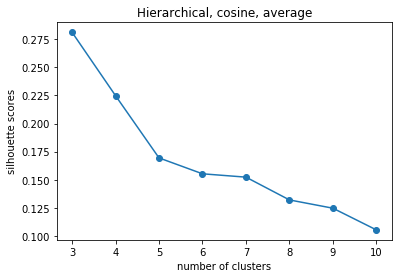

In [51]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'cosine', 'average')

#### Segment Vars4

[0.12826095538590127, 0.08919036725371778, 0.07528268188876265, 0.07497734648861393, 0.07049084259722999, 0.0672567049770867, 0.06389448804578823, 0.06255824579884442]


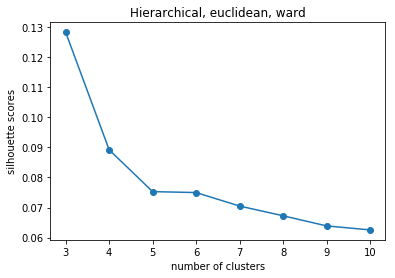

In [52]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'ward')

[0.11095160070564151, 0.09950319136387308, 0.06336536374679011, 0.0640169766785293, 0.050460749762477004, 0.04956468841263455, 0.04937363733038131, 0.035275361666853466]


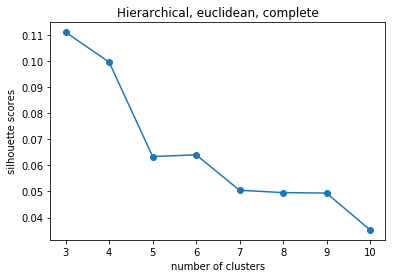

[0.09082321624378746, 0.07049201381085207, 0.06912182450079868, 0.052120395365559374, 0.05134404700776847, 0.04869716987764561, 0.03855231436833939, 0.032037447959436055]


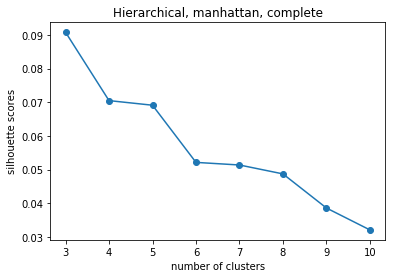

[0.09082321624378746, 0.07049201381085207, 0.06912182450079868, 0.052120395365559374, 0.05134404700776847, 0.04869716987764561, 0.03855231436833939, 0.032037447959436055]


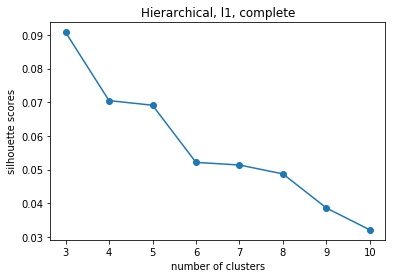

[0.11095160070564151, 0.09950319136387308, 0.06336536374679011, 0.0640169766785293, 0.050460749762477004, 0.04956468841263455, 0.04937363733038131, 0.035275361666853466]


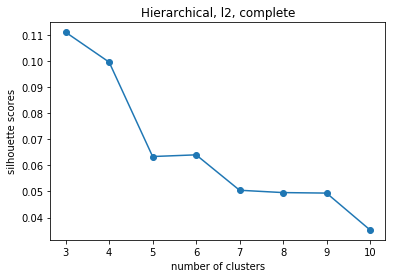

[0.02509461004935546, 0.023992627225656357, 0.03420402300007367, 0.01572838511799237, 0.010159280620309734, 0.007406952400401847, 0.004491796897161338, 0.00217275597354136]


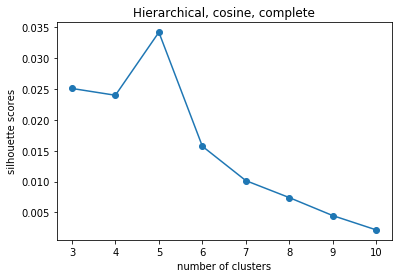

In [53]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'cosine', 'complete')

[0.2512437866358459, 0.1809657702881463, 0.1477827978843028, 0.09197495367898699, 0.04651294931165778, 0.038271954937057304, 0.013320302387304602, 0.07869869699377023]


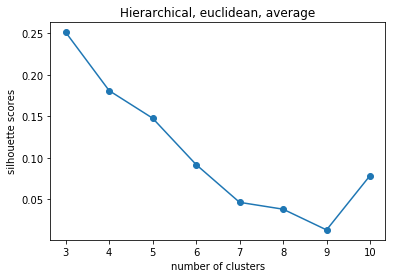

[0.2192423599775353, 0.1781564895842273, 0.16232184254237228, 0.12601889374760555, 0.11724563000862766, 0.11168331750177571, 0.10460322636160739, 0.0697864770537927]


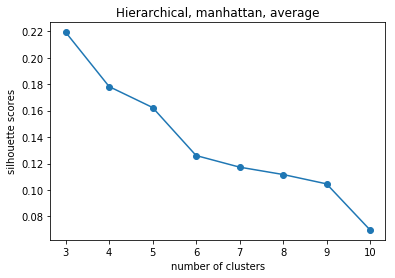

[0.2192423599775353, 0.1781564895842273, 0.16232184254237228, 0.12601889374760555, 0.11724563000862766, 0.11168331750177571, 0.10460322636160739, 0.0697864770537927]


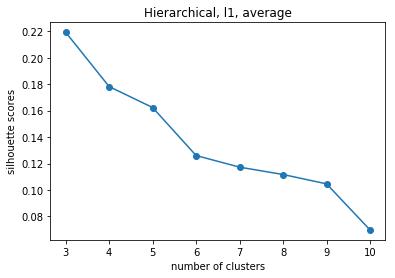

[0.2512437866358459, 0.1809657702881463, 0.1477827978843028, 0.09197495367898699, 0.04651294931165778, 0.038271954937057304, 0.013320302387304602, 0.07869869699377023]


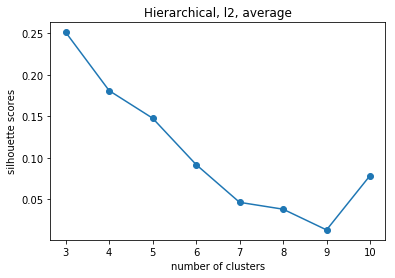

[0.22501300484197725, 0.18332026084513847, 0.12705824466000093, 0.09186221484352496, 0.06314658239180618, 0.00973285585676967, -0.02984175397824327, -0.05903425430752946]


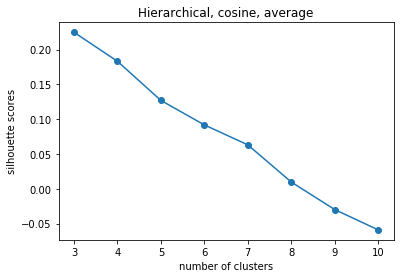

In [54]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'cosine', 'average')

#### Segment Vars 5

[0.28869991606344725, 0.20948840020913795, 0.22218500100098929, 0.21739024453773892, 0.20845318379874586, 0.22042869057731004, 0.21090201911786435, 0.21436614616708663]


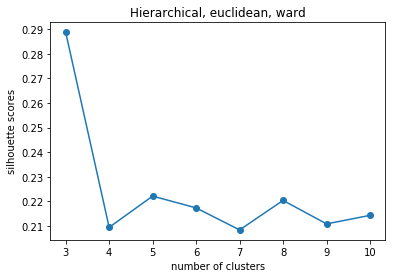

In [55]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'ward')

[0.2631563053616253, 0.19279154274866706, 0.15493001803994116, 0.1521892821753689, 0.1444050903042592, 0.14035885309131843, 0.15678236604824952, 0.15727909290227846]


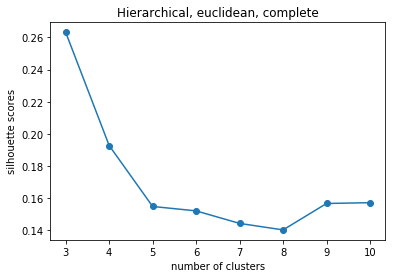

[0.28268071173918863, 0.2233891785674196, 0.1877906466175066, 0.18289483371329762, 0.14528266154799502, 0.12822978033413593, 0.12262087758045793, 0.11401445297069443]


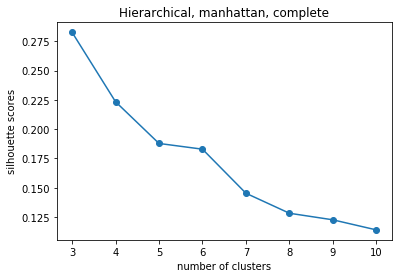

[0.28268071173918863, 0.2233891785674196, 0.1877906466175066, 0.18289483371329762, 0.14528266154799502, 0.12822978033413593, 0.12262087758045793, 0.11401445297069443]


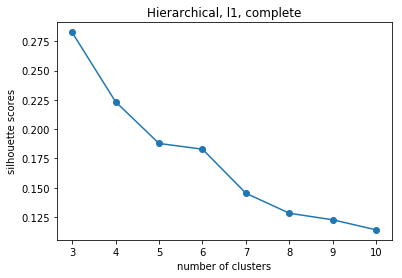

[0.2631563053616253, 0.19279154274866706, 0.15493001803994116, 0.1521892821753689, 0.1444050903042592, 0.14035885309131843, 0.15678236604824952, 0.15727909290227846]


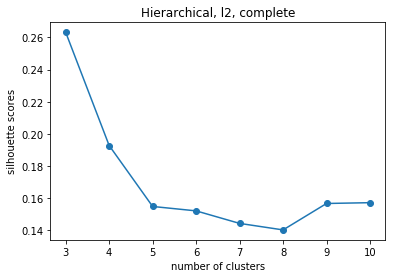

[0.15396717139398122, 0.09560821299767473, 0.1564840593933608, 0.14479613043290704, 0.13448056888572835, 0.13002688722172423, 0.1312454034212603, 0.1403081544138348]


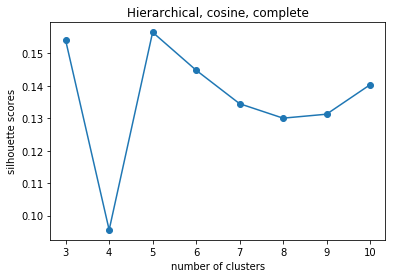

In [56]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'cosine', 'complete')

[0.3707120642052499, 0.31037934281046947, 0.2444962154896893, 0.21570268501696044, 0.17839017326907747, 0.1863203795366144, 0.19951391627979922, 0.19087163054748138]


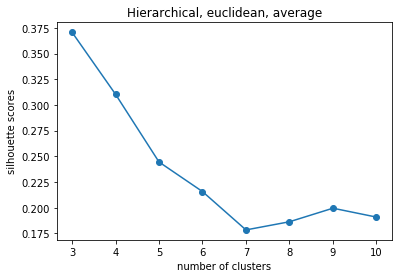

[0.3707120642052499, 0.289184021774239, 0.2209413102407329, 0.21935605837558947, 0.1906059210082266, 0.1807708072047177, 0.18635495478548808, 0.17685700553584943]


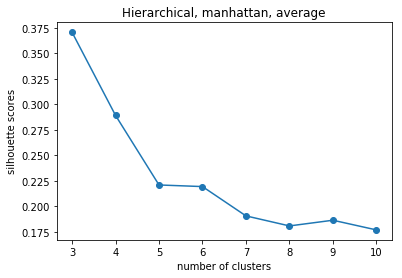

[0.3707120642052499, 0.289184021774239, 0.2209413102407329, 0.21935605837558947, 0.1906059210082266, 0.1807708072047177, 0.18635495478548808, 0.17685700553584943]


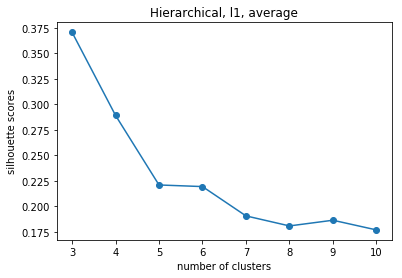

[0.3707120642052499, 0.31037934281046947, 0.2444962154896893, 0.21570268501696044, 0.17839017326907747, 0.1863203795366144, 0.19951391627979922, 0.19087163054748138]


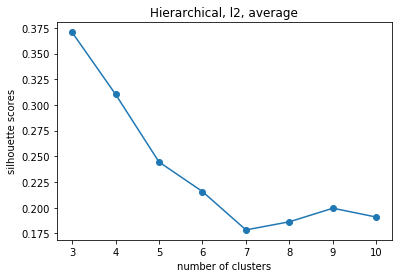

[0.36368984669548016, 0.29370657957198576, 0.20260379892370245, 0.17923154764529187, 0.13495636958524007, 0.15606980299159431, 0.13923282125943026, 0.16194806502851333]


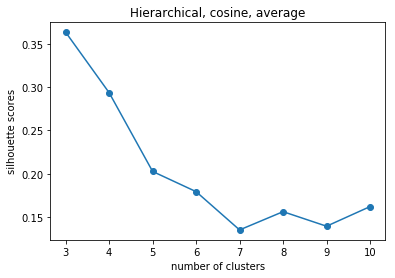

In [57]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'cosine', 'average')

#### Segment Vars 6

[0.4466824029196842, 0.36446727426353764, 0.36352001607899864, 0.3943969728648016, 0.35337601902053767, 0.37427705151046015, 0.3965699809954898, 0.4176743838258855]


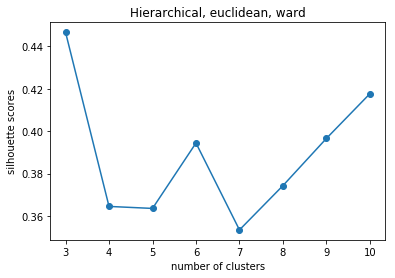

In [58]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'ward')

[0.40557299076321307, 0.2745080328604642, 0.2961411940856988, 0.28544186630156, 0.33035976354911695, 0.35418124905961146, 0.3821826489036282, 0.3817986816120296]


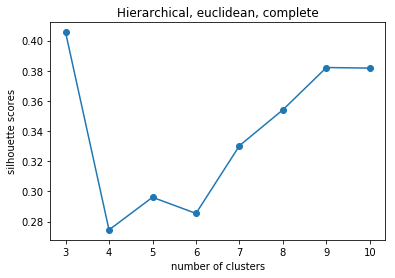

[0.41263118008790844, 0.3145545957487936, 0.33304426363816153, 0.3211032106069021, 0.31671405259061847, 0.3420348662925798, 0.3109189002666847, 0.3469027852941921]


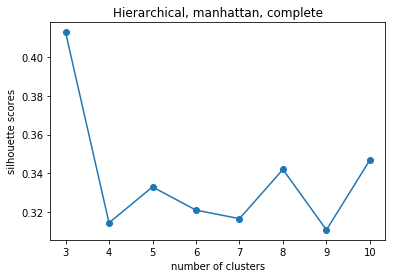

[0.41263118008790844, 0.3145545957487936, 0.33304426363816153, 0.3211032106069021, 0.31671405259061847, 0.3420348662925798, 0.3109189002666847, 0.3469027852941921]


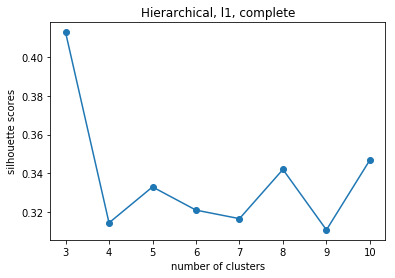

[0.40557299076321307, 0.2745080328604642, 0.2961411940856988, 0.28544186630156, 0.33035976354911695, 0.35418124905961146, 0.3821826489036282, 0.3817986816120296]


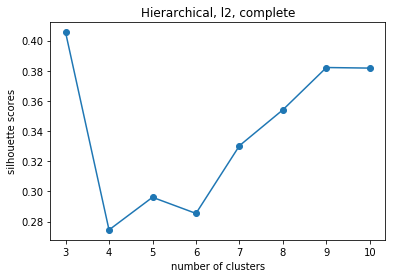

[0.36828005743248693, 0.17897388807977954, 0.1760569512933602, 0.22876763822034307, 0.22786079264245102, 0.22454588514809412, 0.2105112512731423, 0.24169783872336673]


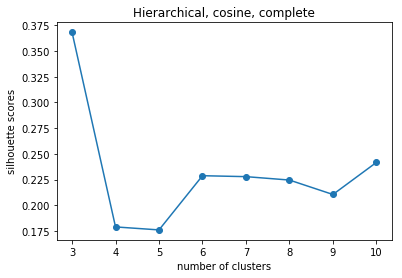

In [59]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'cosine', 'complete')

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193, 0.23372930810524115, 0.29110313984745895]


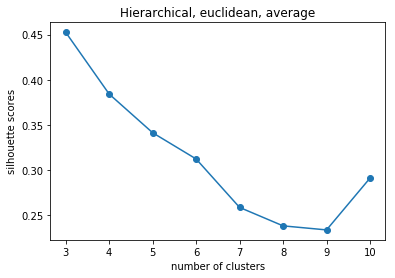

[0.46380544771762716, 0.3539073840329911, 0.28380813956557827, 0.31719346991113206, 0.29433166144927686, 0.28554139267092327, 0.2608632371433378, 0.2601105250397447]


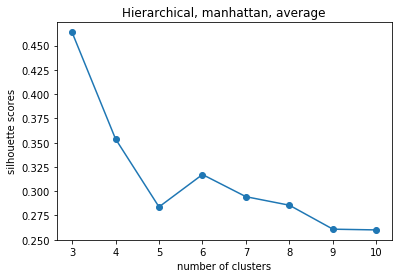

[0.46380544771762716, 0.3539073840329911, 0.28380813956557827, 0.31719346991113206, 0.29433166144927686, 0.28554139267092327, 0.2608632371433378, 0.2601105250397447]


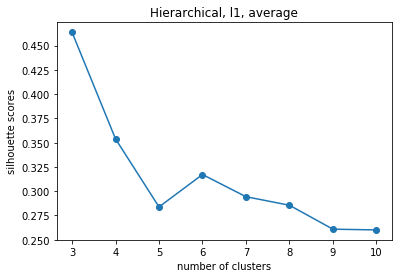

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193, 0.23372930810524115, 0.29110313984745895]


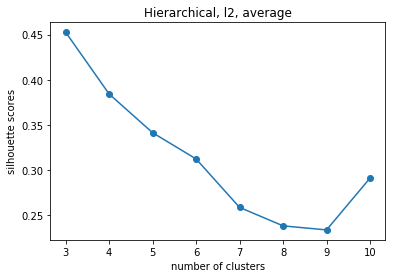

[0.4657208875146521, 0.37023633203534667, 0.38584788133303727, 0.3276957133490589, 0.3184504954110834, 0.290834266602026, 0.2920905020083515, 0.2953110848031887]


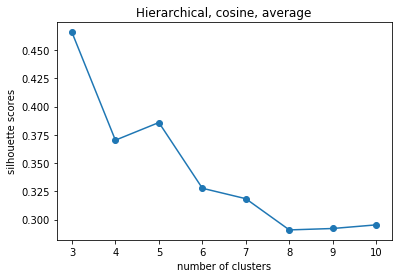

In [60]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'cosine', 'average')

#### Best Hierarchical Score: .4657
- Segment Vars 6
- K = 3
- Linkage = Average
- Affinity = Cosine

# Gaussian Mixture Models

**Parameters to try**:
- Covariance_type:
    - 'full'
    - 'tied'
    - 'diag'
    - 'spherical'
- max_iter

In [61]:
def plot_scores_gauss(X, k_vals, cov_type, max_iter = 100):
    sil_scores = []
    aic_scores = []
    bic_scores = []
    for k in k_vals:
        model = GaussianMixture(n_components = k, 
                                covariance_type= cov_type,
                                max_iter = max_iter)
        fit_model = model.fit(X)
        labels = model.predict(X)
        sil = silhouette_score(X, labels)        
        aic = model.aic(X)
        bic = model.bic(X)
        sil_scores.append(sil)
        aic_scores.append(aic)
        bic_scores.append(bic)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    ax.set_title('Gaussian, Sil Score, {}'.format(cov_type))
    print(sil_scores)
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, aic_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("AIC scores")
    ax.set_title('Gaussian, AIC Score, {}'.format(cov_type))
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, bic_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("BIC scores")
    ax.set_title('Gaussian, BIC Score, {}'.format(cov_type))

    plt.show()

#### Segment Vars2

[0.04057919988748989, 0.07520703658453365, 0.057845639079498815, 0.050544413326834216, 0.03216770470045665, 0.03441508792345427, 0.024565917420772826, 0.025697940739525953]


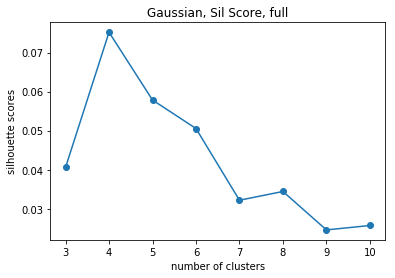

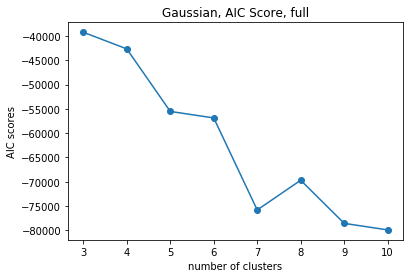

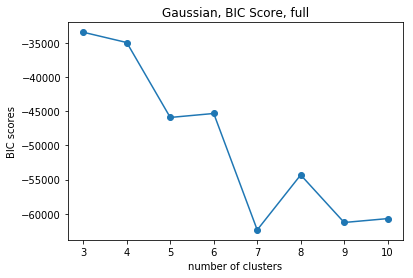

In [62]:
plot_scores_gauss(segment_data2, k_vals, 'full', max_iter = 100)

[0.08395393788595511, 0.07641204182910918, 0.06085798339094896, 0.04618424351353316, 0.036393941174301496, 0.04566092758693063, 0.03443680761544358, 0.02804121976639028]


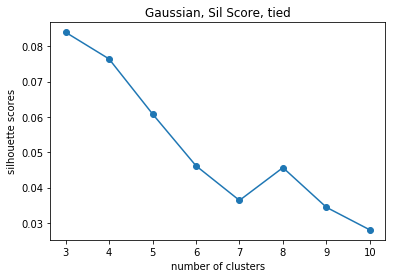

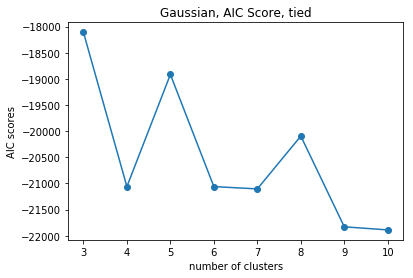

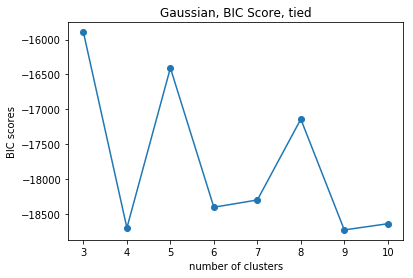

In [63]:
plot_scores_gauss(segment_data2, k_vals, 'tied', max_iter = 100)

[0.08465845253116937, 0.019722754433509182, 0.058630257263148064, 0.04635480023168792, 0.04524307752360355, 0.03588231389741721, 0.031101518781266758, 0.03819452236932185]


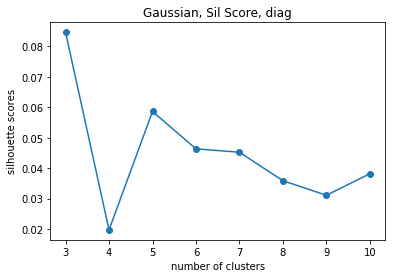

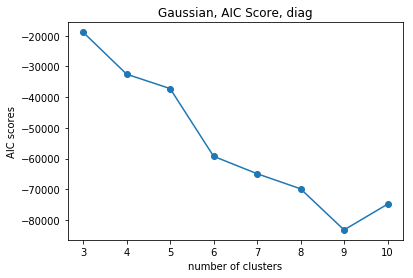

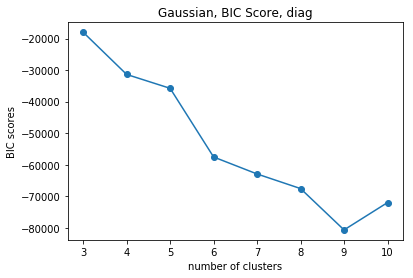

In [64]:
plot_scores_gauss(segment_data2, k_vals, 'diag', max_iter = 100)

[0.1405773366210252, 0.08640134625609396, 0.08152167732974855, 0.05412988173041102, 0.06759459997223624, 0.059242966239579226, 0.04787417751315133, 0.042846930659652824]


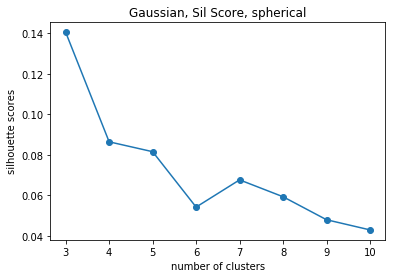

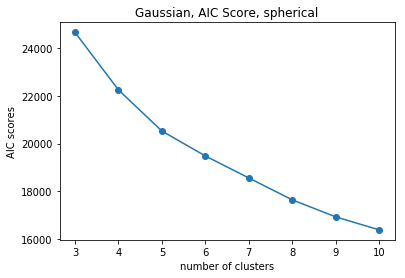

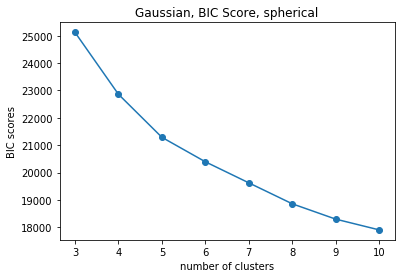

In [65]:
plot_scores_gauss(segment_data2, k_vals, 'spherical', max_iter = 100)

#### Segment Vars3

[0.1689258202062405, 0.19838807750133255, 0.13123420983597023, 0.11662845895170804, 0.07261990401456646, 0.07936501864179309, 0.02771651409298694, 0.03770398526008537]


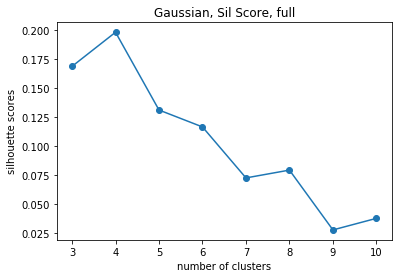

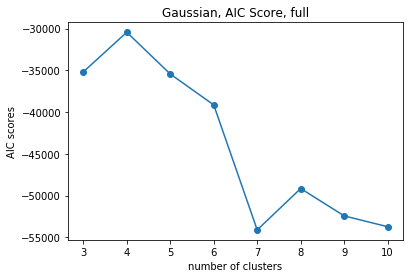

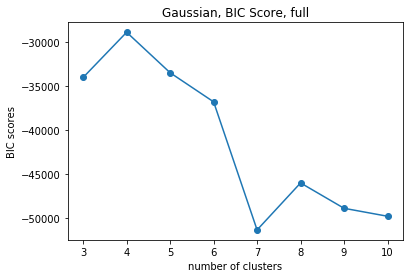

In [66]:
plot_scores_gauss(segment_data3, k_vals, 'full', max_iter = 100)

[0.18117566198668794, 0.16540050687456126, 0.1440340883193963, 0.11485206817057593, 0.10797806525109373, 0.11697238697029765, 0.11422340120785227, 0.12665322797362158]


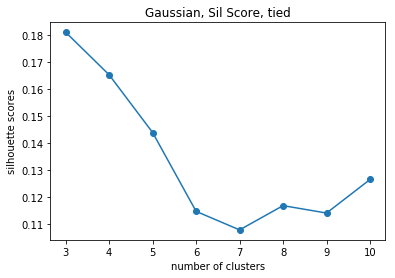

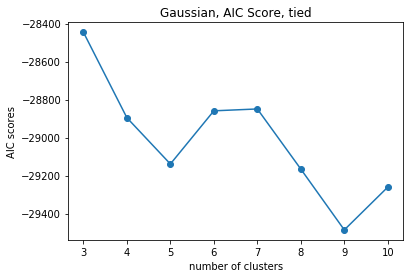

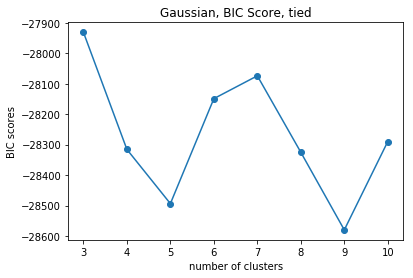

In [67]:
plot_scores_gauss(segment_data3, k_vals, 'tied', max_iter = 100)

[0.25292505537250104, 0.1777368351568854, 0.12373411300170617, 0.12475928378296931, 0.07065181578897578, 0.07946400100642065, 0.06123225085993568, 0.054933584455257894]


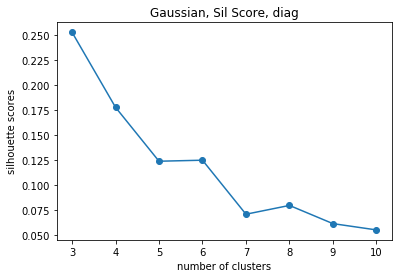

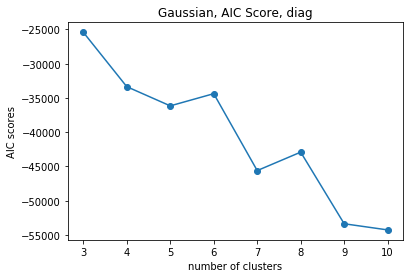

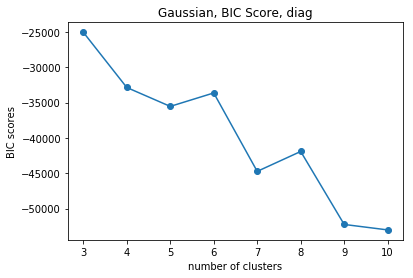

In [68]:
plot_scores_gauss(segment_data3, k_vals, 'diag', max_iter = 100)

[0.1988542280367363, 0.16664389329906576, 0.15114331767846972, 0.14554114791963788, 0.13715784926711502, 0.12800087991195275, 0.12358045870888246, 0.11608382388566]


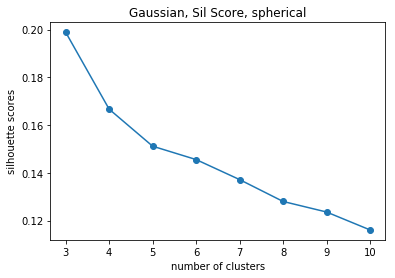

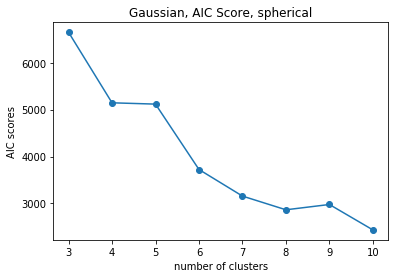

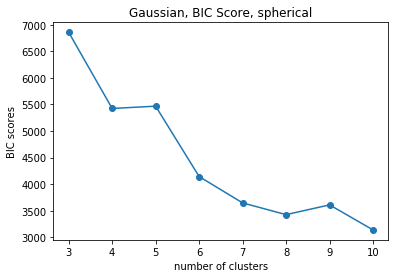

In [69]:
plot_scores_gauss(segment_data3, k_vals, 'spherical', max_iter = 100)

#### Segment Vars4

[0.14018929352558143, 0.10044416398152492, 0.050541605674677414, 0.03794883740924076, 0.0317723338951108, 0.028790299223262993, 0.026580917699006744, 0.02536242060409368]


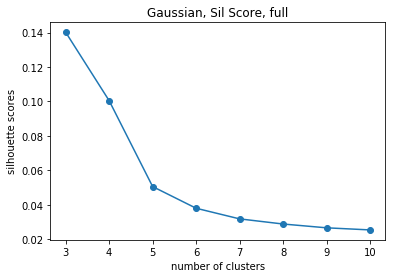

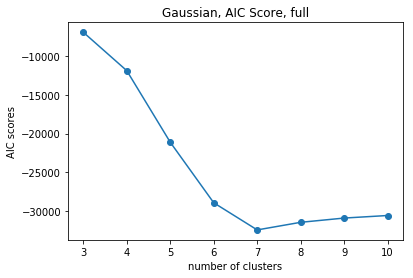

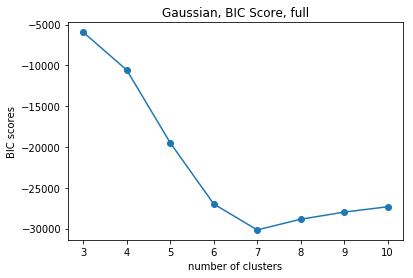

In [70]:
plot_scores_gauss(segment_data4, k_vals, 'full', max_iter = 100)

[0.13683573272881386, 0.11769494873469602, 0.11755052649314894, 0.11616413215497237, 0.10536195404026907, 0.07993036866523193, 0.09148455739623938, 0.10111611612143474]


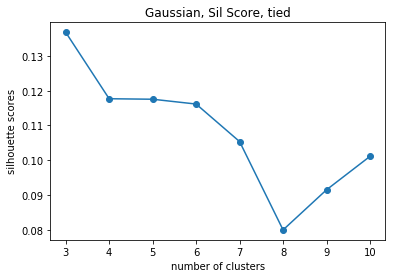

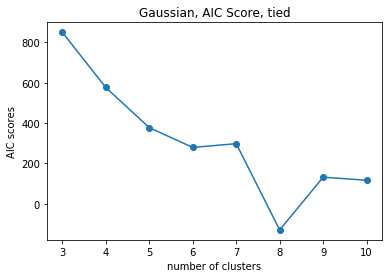

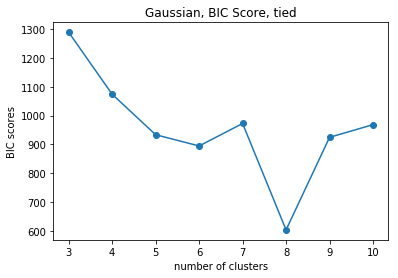

In [71]:
plot_scores_gauss(segment_data4, k_vals, 'tied', max_iter = 100)

[0.09035635901761264, 0.09529103167499937, 0.04907109115858492, 0.06055661390486377, 0.04726756940163521, 0.04463365643947914, 0.04826053452099877, 0.01931345006188785]


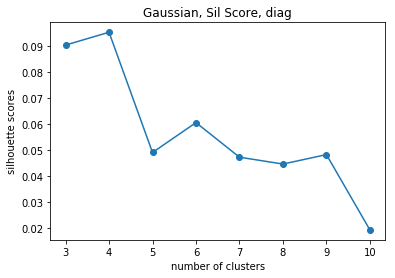

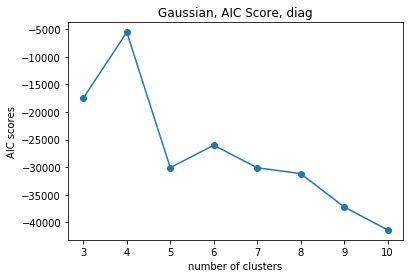

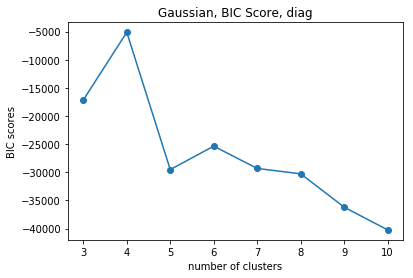

In [72]:
plot_scores_gauss(segment_data4, k_vals, 'diag', max_iter = 100)

[0.14840486566670014, 0.14018154609333525, 0.13012278990745368, 0.12651343844464058, 0.11726437583239824, 0.12161836372996399, 0.11873489224417681, 0.11323090566247794]


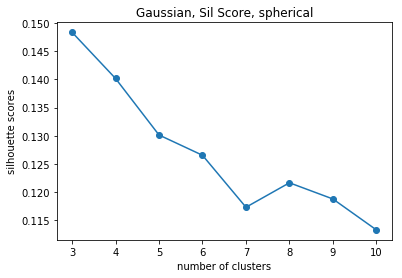

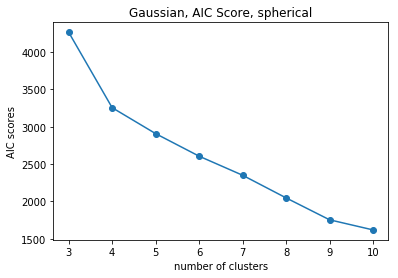

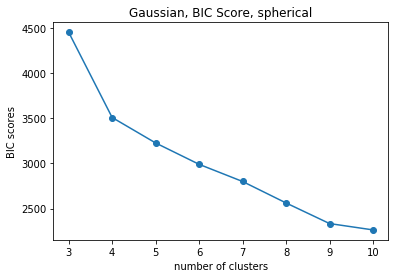

In [73]:
plot_scores_gauss(segment_data4, k_vals, 'spherical', max_iter = 100)

#### Segment Vars5

[0.3366979509840268, 0.23977671157882338, 0.23649147574592, 0.1976397295638277, 0.2153067521120603, 0.14147153150793085, 0.23537478140207396, 0.15758134179270877]


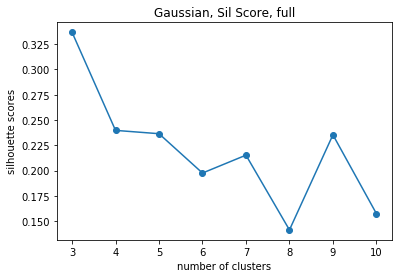

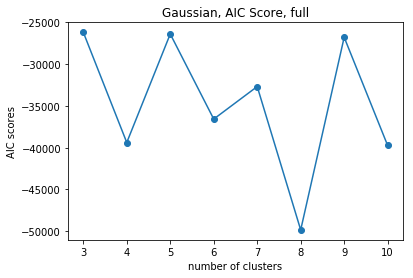

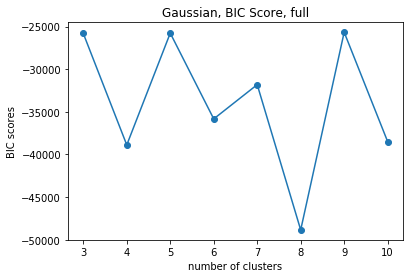

[0.31276836170081873, 0.2698586335788085, 0.2668527258077509, 0.25620194991797796, 0.2563686664492318, 0.2412795537295078, 0.2451463681126957, 0.24821659014816375]


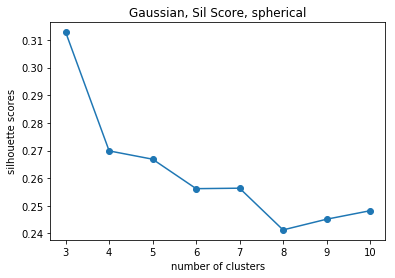

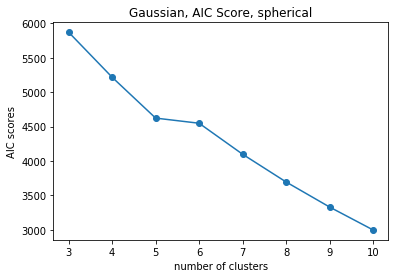

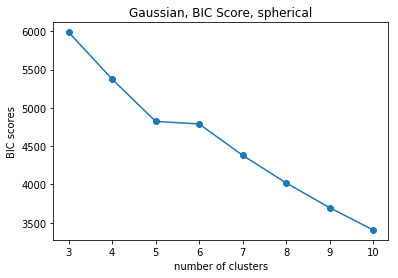

In [74]:
plot_scores_gauss(segment_data5, k_vals, 'full', max_iter = 100)
plot_scores_gauss(segment_data5, k_vals, 'spherical', max_iter = 100)

#### Segment Vars 6

[0.4513133122630161, 0.38817548485765757, 0.3608655400546529, 0.34397452899107867, 0.28633208994810216, 0.3318860024226639, 0.2709404378835359, 0.307627941042394]


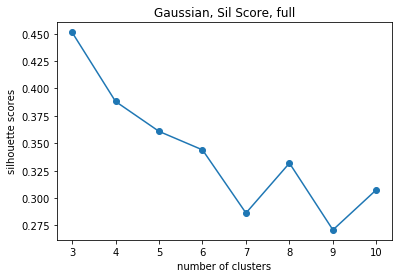

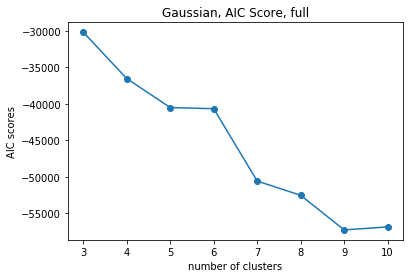

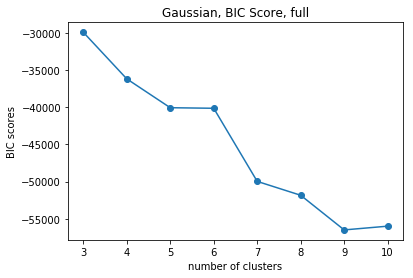

[0.45112717371537525, 0.3928321171527318, 0.2896806886750942, 0.3941129292044644, 0.2812618941296009, 0.3208618542105318, 0.26453476829137185, 0.3360023578197475]


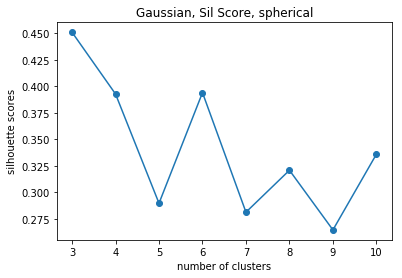

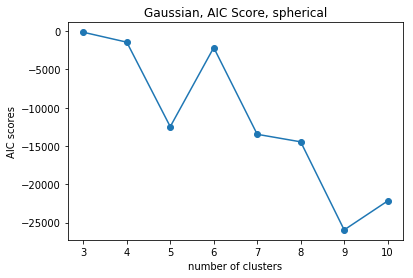

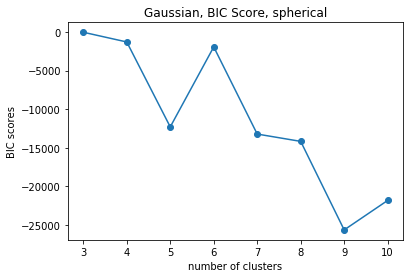

In [75]:
plot_scores_gauss(segment_data6, k_vals, 'full', max_iter = 100)
plot_scores_gauss(segment_data6, k_vals, 'spherical', max_iter = 100)

#### Best Gaussian Score: .451
- Segment Vars 6
- K = 3
- Covariance Type = Spherical